# 축구 데이터 분석 4주차

__드라이브에서 받으신 data.zip 안의 내용물을 week4/data 폴더를 만들고 data 폴더 안에 위치시켜 주세요__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

프로젝트 폴더로 경로 이동

In [ ]:
%cd /content/drive/MyDrive/week4

/content/drive/MyDrive/week4가 떠야 합니다.

In [ ]:
!pwd

In [ ]:
!unzip data/data.zip -d data/ #압축 해제

## 이벤트 데이터 준비

In [1]:
# import autoreload
# %load_ext autoreload
# %autoreload 2
import sys
import pandas as pd
sys.path.append('.')
from data_utils import refine_and_save_events

refine_and_save_events(dataset_name='England')

England                : 100%|██████████| 380/380 [00:31<00:00, 12.12it/s]


In [2]:
match_events = pd.read_pickle('data/refined_events/England/2499719.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499719,177959171,1H,2.759,1609,Arsenal,25413,A. Lacazette,Pass,Simple pass,[Accurate],50.96,34.68,32.24,14.96
1,2499719,177959172,1H,4.947,1609,Arsenal,370224,R. Holding,Pass,High pass,[Accurate],32.24,14.96,53.04,17.00
2,2499719,177959173,1H,6.542,1609,Arsenal,3319,M. Özil,Pass,Head pass,[Accurate],53.04,17.00,36.40,19.72
3,2499719,177959174,1H,8.143,1609,Arsenal,120339,Mohamed Elneny,Pass,Head pass,[Accurate],36.40,19.72,42.64,3.40
4,2499719,177959175,1H,10.302,1609,Arsenal,167145,Bellerín,Pass,Simple pass,[Accurate],42.64,3.40,74.88,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,2499719,177961040,2H,2992.492,1631,Leicester City,8480,K. Schmeichel,Pass,Launch,[Not accurate],7.28,31.96,47.84,34.68
1776,2499719,177961035,2H,2994.901,1609,Arsenal,49876,G. Xhaka,Pass,Head pass,[Accurate],56.16,33.32,75.92,28.56
1777,2499719,177961036,2H,2997.086,1609,Arsenal,7870,A. Ramsey,Shot,Shot,"[Right foot, Opportunity, Position: Out high r...",75.92,28.56,104.00,34.00
1778,2499719,177961041,2H,2998.964,1631,Leicester City,0,NaN,Interruption,Ball out of the field,[],3.12,35.36,NaN,NaN


In [3]:
match_events.event_type.value_counts()

event_type
Pass                       836
Duel                       512
Others on the ball         144
Free kick                  113
Interruption                84
Shot                        34
Foul                        21
Save attempt                14
Substitution                12
Offside                      8
Goalkeeper leaving line      2
Name: count, dtype: int64

In [4]:
match_events[match_events.event_type == "Save attempt"]["sub_event_type"].value_counts()

sub_event_type
Reflexes        10
Save attempt     4
Name: count, dtype: int64

## 이벤트 데이터 이해

1) 경기 정보 불러오기

In [5]:
match_df = pd.read_csv(
    f"data/refined_events/England/matches.csv"
)

match_df

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
0,1,2017-08-11 18:45:00,Emirates Stadium,1609,Arsenal,4,1631,Leicester City,3,Regular
1,1,2017-08-12 11:30:00,Vicarage Road Stadium,1644,Watford,3,1612,Liverpool,3,Regular
2,1,2017-08-12 14:00:00,St. Mary's Stadium,1619,Southampton,0,10531,Swansea City,0,Regular
3,1,2017-08-12 14:00:00,Stamford Bridge,1610,Chelsea,2,1646,Burnley,3,Regular
4,1,2017-08-12 14:00:00,The Hawthorns,1627,West Bromwich Albion,1,1659,AFC Bournemouth,0,Regular
...,...,...,...,...,...,...,...,...,...,...
375,38,2018-05-13 14:00:00,Anfield,1612,Liverpool,4,1651,Brighton & Hove Albion,0,Regular
376,38,2018-05-13 14:00:00,The John Smith's Stadium,1673,Huddersfield Town,0,1609,Arsenal,1,Regular
377,38,2018-05-13 14:00:00,Selhurst Park,1628,Crystal Palace,2,1627,West Bromwich Albion,0,Regular
378,38,2018-05-13 14:00:00,London Stadium,1633,West Ham United,3,1623,Everton,1,Regular


(2) 경기 정보 필터링

In [6]:
match_df[(match_df['team1_name'] == 'Chelsea') & (match_df['team2_name'] == 'Everton')]

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
26,3,2017-08-27 12:30:00,Stamford Bridge,1610,Chelsea,2,1623,Everton,0,Regular


(3) 경기 이벤트 데이터 불러오기

In [7]:
match_events = pd.read_pickle('data/refined_events/England/2499723.pkl')
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499723,178214462,1H,10.432,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],104.00,4.76,NaN,NaN
1,2499723,178214455,1H,31.175,1623,Everton,10131,J. Pickford,Free kick,Goal kick,[],0.00,34.00,68.64,7.48
2,2499723,178214463,1H,33.73,1639,Stoke City,107,E. Pieters,Duel,Air duel,"[Neutral, Accurate]",35.36,60.52,22.88,68.00
3,2499723,178214456,1H,33.813,1623,Everton,293687,D. Calvert-Lewin,Duel,Air duel,"[Neutral, Accurate]",68.64,7.48,81.12,0.00
4,2499723,178214464,1H,38.693,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],17.68,68.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,2499723,178216186,2H,2891.024,1623,Everton,25706,I. Gueye,Duel,Ground loose ball duel,"[Won, Accurate]",30.16,43.52,29.12,42.16
1655,2499723,178215767,2H,2894.703,1639,Stoke City,7932,D. Fletcher,Foul,Foul,[],74.88,25.84,NaN,NaN
1656,2499723,178216187,2H,2934.945,1623,Everton,10131,J. Pickford,Free kick,Free kick,[Not accurate],21.84,42.16,86.32,68.00
1657,2499723,178215772,2H,2944.661,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],17.68,0.00,NaN,NaN


### 이벤트 데이터 인덱싱(indexing), 슬라이싱(slicing), 필터링 (filtering)

(1) 열 인덱싱(column indexing)

In [8]:
match_events['player_name']

0                    NaN
1            J. Pickford
2             E. Pieters
3       D. Calvert-Lewin
4                    NaN
              ...       
1654            I. Gueye
1655         D. Fletcher
1656         J. Pickford
1657                 NaN
1658          G. Cameron
Name: player_name, Length: 1659, dtype: object

(2) 행 인덱싱(row indexing)

In [9]:
match_events.loc[0]

match_id                        2499723
event_id                      178214462
period                               1H
time                             10.432
team_id                            1639
team_name                    Stoke City
player_id                             0
player_name                         NaN
event_type                 Interruption
sub_event_type    Ball out of the field
tags                                 []
start_x                           104.0
start_y                            4.76
end_x                               NaN
end_y                               NaN
Name: 0, dtype: object

(3) 슬라이싱

In [10]:
match_events[:15]

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499723,178214462,1H,10.432,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],104.00,4.76,NaN,NaN
1,2499723,178214455,1H,31.175,1623,Everton,10131,J. Pickford,Free kick,Goal kick,[],0.00,34.00,68.64,7.48
2,2499723,178214463,1H,33.73,1639,Stoke City,107,E. Pieters,Duel,Air duel,"[Neutral, Accurate]",35.36,60.52,22.88,68.00
3,2499723,178214456,1H,33.813,1623,Everton,293687,D. Calvert-Lewin,Duel,Air duel,"[Neutral, Accurate]",68.64,7.48,81.12,0.00
4,2499723,178214464,1H,38.693,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],17.68,68.00,NaN,NaN
5,2499723,178214465,1H,42.611,1639,Stoke City,58978,G. Cameron,Free kick,Throw in,[Not accurate],22.88,68.00,68.64,65.96
6,2499723,178214457,1H,46.324,1623,Everton,7919,M. Keane,Pass,Head pass,[Accurate],35.36,2.04,61.36,3.40
7,2499723,178214458,1H,47.005,1623,Everton,293687,D. Calvert-Lewin,Duel,Ground loose ball duel,"[Lost, Not accurate]",61.36,3.40,66.56,4.08
8,2499723,178214466,1H,47.214,1639,Stoke City,107,E. Pieters,Duel,Ground loose ball duel,"[Won, Accurate]",42.64,64.60,37.44,63.92
9,2499723,178214467,1H,48.488,1639,Stoke City,7932,D. Fletcher,Pass,Simple pass,[Not accurate],37.44,63.92,46.80,64.60


(4) 필터링 또는 불린 인덱싱(Boolean indexing)

In [11]:
match_events[match_events['event_type'] == 'Shot'].head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
224,2499723,178214801,1H,725.763,1623,Everton,5911,Sandro,Shot,Shot,"[Right foot, Opportunity, Position: Out low le...",86.32,37.40,104.00,34.00
257,2499723,178214652,1H,871.509,1639,Stoke City,77548,J. Allen,Shot,Shot,"[Right foot, Blocked, Not accurate]",79.04,23.80,94.64,38.76
260,2499723,178214661,1H,874.345,1639,Stoke City,77548,J. Allen,Shot,Shot,"[Right foot, Blocked, Not accurate]",86.32,22.44,92.56,31.28
378,2499723,178215005,1H,1190.187,1623,Everton,25706,I. Gueye,Shot,Shot,"[Right foot, Opportunity, Position: Goal low r...",82.16,19.04,104.00,34.00
440,2499723,178215090,1H,1430.878,1623,Everton,25706,I. Gueye,Shot,Shot,"[Right foot, Opportunity, Position: Out low le...",86.32,27.88,104.00,34.00


### 중복 제거를 활용한 데이터 구성 파악
(1) Series 원소 중복 제거

- 전후반 구분

In [12]:
match_events['period'].unique()

array(['1H', '2H'], dtype=object)

- 팀 구분

In [13]:
match_events['team_name'].unique()

array(['Stoke City', 'Everton'], dtype=object)

- 경기 출전 선수

In [14]:
match_events['player_name'].unique()

array([nan, 'J. Pickford', 'E. Pieters', 'D. Calvert-Lewin', 'G. Cameron',
       'M. Keane', 'D. Fletcher', 'I. Gueye', 'W. Rooney', 'J. Butland',
       'S. Berahino', 'A. Williams', 'D. Klaassen', 'M. Schneiderlin',
       'Bojan', 'K. Zouma', 'X. Shaqiri', 'M. Diouf', 'J. Allen',
       'P. Jagielka', 'L. Baines', 'Sandro', 'R. Shawcross',
       'Cuco Martina', 'T. Davies', 'E. Choupo-Moting', 'P. Crouch',
       'K. Mirallas'], dtype=object)

### (2) DataFrame 행 중복 제거
- 팀과 선수의 ID 및 이름

In [15]:
match_events[['team_id', 'team_name', 'player_id', 'player_name']].drop_duplicates()

,team_id,team_name,player_id,player_name
0,1639,Stoke City,0,NaN
1,1623,Everton,10131,J. Pickford
2,1639,Stoke City,107,E. Pieters
3,1623,Everton,293687,D. Calvert-Lewin
5,1639,Stoke City,58978,G. Cameron
6,1623,Everton,7919,M. Keane
9,1639,Stoke City,7932,D. Fletcher
12,1623,Everton,0,NaN
13,1623,Everton,25706,I. Gueye
14,1623,Everton,7944,W. Rooney


- 이벤트 유형의 종류

In [16]:
match_events[['event_type', 'sub_event_type']].drop_duplicates().sort_values(by=['event_type', 'sub_event_type'])


,event_type,sub_event_type
2,Duel,Air duel
40,Duel,Ground attacking duel
39,Duel,Ground defending duel
7,Duel,Ground loose ball duel
66,Foul,Foul
167,Free kick,Corner
145,Free kick,Free kick
67,Free kick,Free kick cross
1,Free kick,Goal kick
5,Free kick,Throw in


### (3) List 원소 중복 제거
- 추가 태그의 종류

In [17]:
match_events['tags'].sum()[:20]

['Neutral',
 'Accurate',
 'Neutral',
 'Accurate',
 'Not accurate',
 'Accurate',
 'Lost',
 'Not accurate',
 'Won',
 'Accurate',
 'Not accurate',
 'Accurate',
 'Lost',
 'Not accurate',
 'Won',
 'Accurate',
 'Accurate',
 'Not accurate',
 'Not accurate',
 'Not accurate']

In [18]:
set(match_events['tags'].sum())

{15198,
 20450,
 340,
 353236,
 56,
 5911,
 77546,
 8747,
 92922,
 9532,
 'Accurate',
 'Anticipated',
 'Anticipation',
 'Assist',
 'Blocked',
 'Counter attack',
 'Dangerous ball lost',
 'Free space left',
 'Free space right',
 'Goal',
 'Head/body',
 'High',
 'Interception',
 'Key pass',
 'Left foot',
 'Lost',
 'Missed ball',
 'Neutral',
 'Not accurate',
 'Opportunity',
 'Position: Goal center',
 'Position: Goal center left',
 'Position: Goal center right',
 'Position: Goal low right',
 'Position: Out high center',
 'Position: Out high right',
 'Position: Out low left',
 'Position: Out low right',
 'Right foot',
 'Sliding tackle',
 'Take on left',
 'Take on right',
 'Through',
 'Won',
 'Yellow card'}

In [19]:
match_events[match_events['event_type'] == 'Substitution']

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
807,2499723,0,2H,0.0,1623,Everton,340,Cuco Martina,Substitution,Player in,[77546],NaN,NaN,NaN,NaN
808,2499723,0,2H,0.0,1623,Everton,77546,A. Williams,Substitution,Player out,[340],NaN,NaN,NaN,NaN
1076,2499723,0,2H,840.0,1623,Everton,353236,T. Davies,Substitution,Player in,[56],NaN,NaN,NaN,NaN
1077,2499723,0,2H,840.0,1623,Everton,56,D. Klaassen,Substitution,Player out,[353236],NaN,NaN,NaN,NaN
1267,2499723,0,2H,1560.0,1639,Stoke City,15198,E. Choupo-Moting,Substitution,Player in,[20450],NaN,NaN,NaN,NaN
1268,2499723,0,2H,1560.0,1639,Stoke City,20450,Bojan,Substitution,Player out,[15198],NaN,NaN,NaN,NaN
1269,2499723,0,2H,1560.0,1639,Stoke City,8747,P. Crouch,Substitution,Player in,[9532],NaN,NaN,NaN,NaN
1270,2499723,0,2H,1560.0,1639,Stoke City,9532,S. Berahino,Substitution,Player out,[8747],NaN,NaN,NaN,NaN
1359,2499723,0,2H,1860.0,1623,Everton,92922,K. Mirallas,Substitution,Player in,[5911],NaN,NaN,NaN,NaN
1360,2499723,0,2H,1860.0,1623,Everton,5911,Sandro,Substitution,Player out,[92922],NaN,NaN,NaN,NaN


## 이벤트 데이터 시각화

### 경기 데이터 불러오기

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plot_utils import *

In [21]:
match_id = 2057988
match_events = pd.read_pickle('/home/2025FDA/week4/data/refined_events/England/2499723.pkl')
match_events.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499723,178214462,1H,10.432,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],104.00,4.76,NaN,NaN
1,2499723,178214455,1H,31.175,1623,Everton,10131,J. Pickford,Free kick,Goal kick,[],0.00,34.00,68.64,7.48
2,2499723,178214463,1H,33.73,1639,Stoke City,107,E. Pieters,Duel,Air duel,"[Neutral, Accurate]",35.36,60.52,22.88,68.00
3,2499723,178214456,1H,33.813,1623,Everton,293687,D. Calvert-Lewin,Duel,Air duel,"[Neutral, Accurate]",68.64,7.48,81.12,0.00
4,2499723,178214464,1H,38.693,1639,Stoke City,0,NaN,Interruption,Ball out of the field,[],17.68,68.00,NaN,NaN


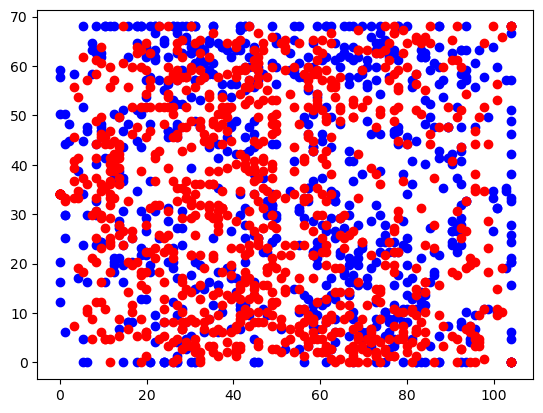

In [22]:
team1_name, team2_name = match_events['team_name'].unique()
team1_events = match_events[match_events['team_name'] == team1_name]
team2_events = match_events[match_events['team_name'] == team2_name]
plt.scatter(team1_events['start_x'], team1_events['start_y'], c='blue')
plt.scatter(team2_events['start_x'], team2_events['start_y'], c='red')
plt.show()

(2) 공개 코드를 이용한 경기장 이미지 시각화

(<Figure size 1040x680 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f426fd30dc0>)

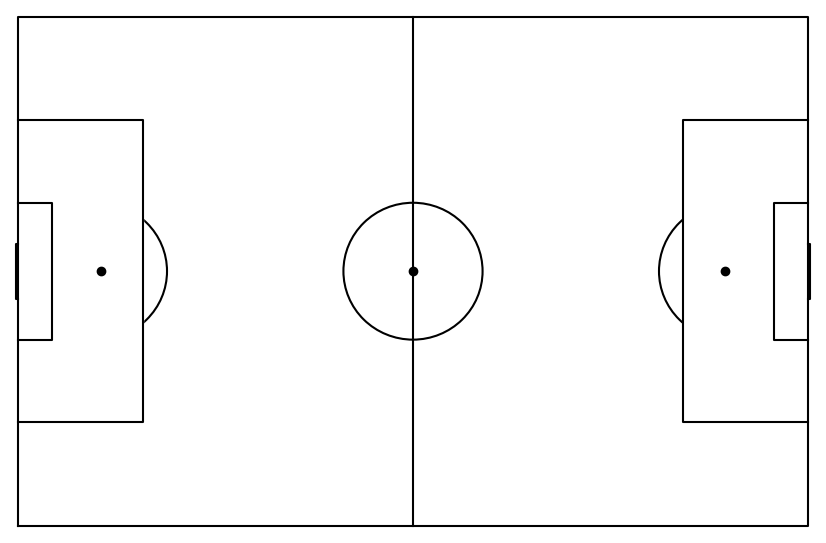

In [23]:
draw_pitch(pitch='white', line='black')

(3) 경기장 이미지 위에 이벤트 발생 위치 시각화 및 꾸미기

In [24]:
# team2 이벤트 좌표 뒤집기 (x는 0~104, y는 0~68 범위 가정)
cols_x = ['start_x', 'end_x']
cols_y = ['start_y', 'end_y']

team2_events.loc[:, cols_x] = 104 - team2_events[cols_x].values
team2_events.loc[:, cols_y] = 68 - team2_events[cols_y].values


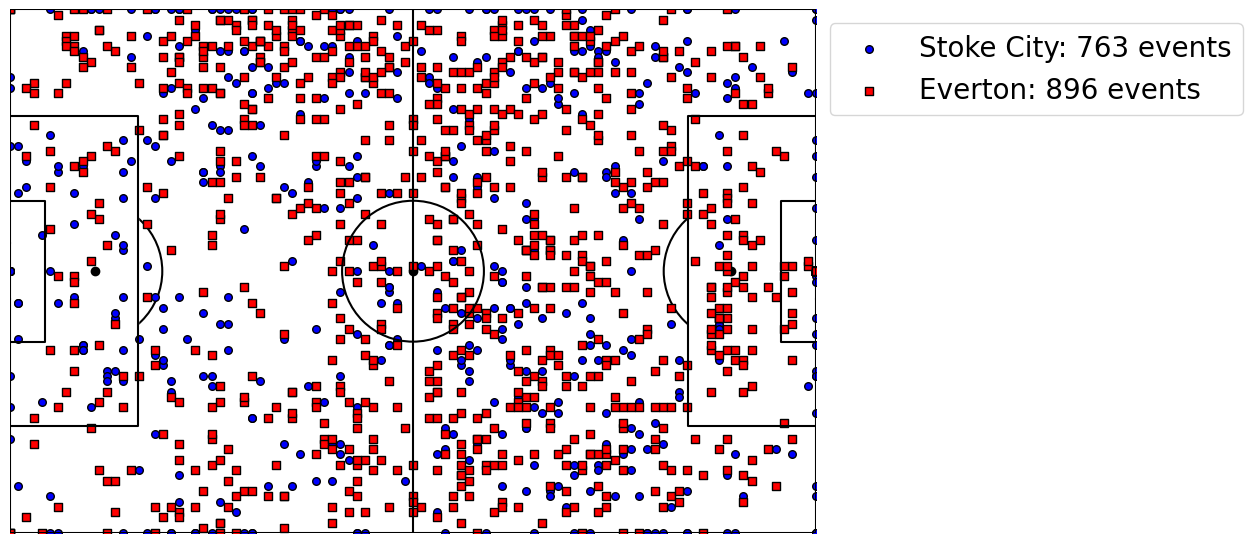

In [25]:
# 피치 배경 그리기
draw_pitch('white', 'black')

# 팀1 이벤트 (원형, 파란색)
plt.scatter(
    team1_events['start_x'], team1_events['start_y'],
    c='blue', edgecolors='black', s=30, marker='o',
    label=f'{team1_name}: {len(team1_events)} events'
)

# 팀2 이벤트 (사각형, 빨간색)
plt.scatter(
    team2_events['start_x'], team2_events['start_y'],
    c='red', edgecolors='black', s=30, marker='s',
    label=f'{team2_name}: {len(team2_events)} events'
)

# x, y 축 범위 경기장 크기에 맞추기
plt.xlim(0, 104)
plt.ylim(0, 68)

# 범례
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))

# 저장 or 출력
# plt.savefig('img/event_scatter.png', bbox_inches='tight')
plt.show()


(4) plt.arrow 함수를 활용한 패스 경로 시각화

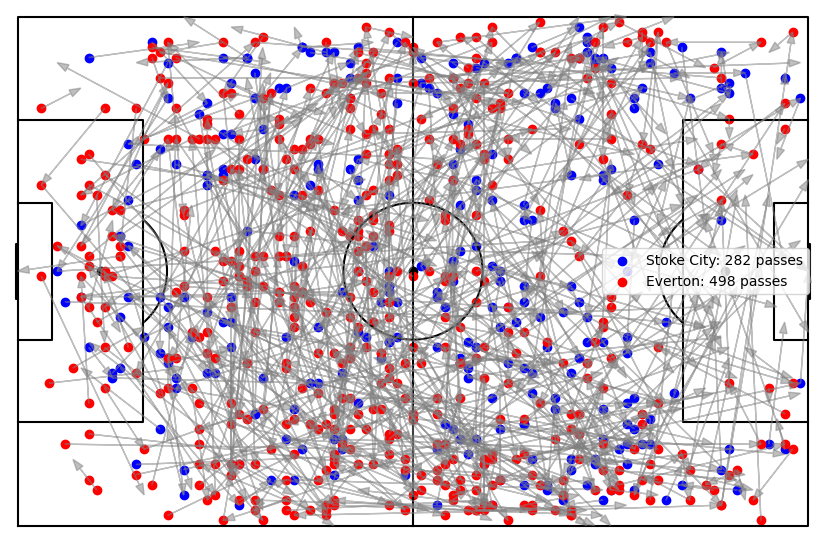

In [26]:
# 패스 기록 필터링
pass_records = match_events[
    (match_events['event_type'] == 'Pass') |
    (match_events['sub_event_type'].isin(['Free kick', 'Free kick cross']))
]

team1_pass_records = pass_records[pass_records['team_name'] == team1_name]
team2_pass_records = pass_records[pass_records['team_name'] == team2_name]

# 피치 그리기
draw_pitch('white', 'black')

# 팀1 패스 시작 위치
plt.scatter(
    team1_pass_records['start_x'], team1_pass_records['start_y'],
    marker='o', color='blue', label=f'{team1_name}: {len(team1_pass_records)} passes'
)
# 팀2 패스 시작 위치
plt.scatter(
    team2_pass_records['start_x'], team2_pass_records['start_y'],
    marker='o', color='red', label=f'{team2_name}: {len(team2_pass_records)} passes'
)

# 패스 방향 화살표 표시
for _, record in pass_records.iterrows():
    x, y   = record['start_x'], record['start_y']
    dx, dy = record['end_x'] - x, record['end_y'] - y
    plt.arrow(
        x, y, dx, dy,
        head_width=1.0, head_length=1.5,  # 화살표 크기
        fc='gray', ec='gray', alpha=0.5,  # 색상/투명도
        length_includes_head=True
    )

plt.legend()
plt.show()


### 이벤트 위치 반응형 시각화(interactive plotting)
(1) go.Scatter 클래스를 활용한 이벤트 위치 반응형 시각화

In [27]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# 1) 표시시간 컬럼 만들기 (period + mm:ss)
match_events = match_events.copy()
match_events["display_time"] = match_events.apply(
    lambda r: f"{r['period']} {int(r['time']//60):02d}:{int(r['time']%60):02d}",
    axis=1
)

# 2) 라벨 함수: hover에 보여줄 텍스트
label_func = lambda r: f"{r['event_type']} by {r.get('player_name','N/A')}, {r['display_time']}"

# 3) 팀별 데이터 분리
team1_events = match_events[match_events["team_name"] == team1_name].copy()
team2_events = match_events[match_events["team_name"] == team2_name].copy()

# 4) 팀2 좌표 미러링 (104×68 기준)
team2_events.loc[:, ["start_x", "end_x"]] = 104 - team2_events[["start_x", "end_x"]].values
team2_events.loc[:, ["start_y", "end_y"]] = 68  - team2_events[["start_y", "end_y"]].values

# 5) Plotly traces (hover는 text 사용)
team1_trace = go.Scatter(
    x=team1_events["start_x"],
    y=team1_events["start_y"],
    name=team1_name,
    text=team1_events.apply(label_func, axis=1),
    mode="markers",
    marker=dict(size=8, color="blue"),
    hovertemplate="%{text}<extra></extra>"
)

team2_trace = go.Scatter(
    x=team2_events["start_x"],
    y=team2_events["start_y"],
    name=team2_name,
    text=team2_events.apply(label_func, axis=1),
    mode="markers",
    marker=dict(size=8, color="red", symbol="square"),
    hovertemplate="%{text}<extra></extra>"
)

match_title = f"{team1_name} - {team2_name}"

def default_pitch_layout(title):
    return go.Layout(
        title=title,
        xaxis=dict(range=[0,104], showgrid=False, zeroline=False),
        yaxis=dict(range=[0,68], showgrid=False, zeroline=False, scaleanchor="x", scaleratio=1),
        width=900, height=600,
        plot_bgcolor="white",
        paper_bgcolor="white",
        margin=dict(l=40, r=40, t=60, b=40),
        legend=dict(x=1, y=1, xanchor="right", yanchor="top")
    )

try:
    layout = get_pitch_layout(match_title)
except NameError:
    layout = default_pitch_layout(match_title)

fig = go.Figure(data=[team1_trace, team2_trace], layout=layout)
fig.show()


(2) 이벤트 위치 반응형 시각화 함수 구현

- 시각화 함수 정의

In [28]:
import pandas as pd
import plotly.graph_objects as go

def plot_events(
    events: pd.DataFrame,
    col_name: str,
    group_dict: dict,
    event_type: str = "all",
    rotate_team2_events: bool = True,
    team1_name: str = None,
    team2_name: str = None
):
    """
    events: 이벤트 데이터프레임 (start_x, start_y, end_x, end_y, event_type, team_name, player_name, period, time 포함 권장)
    col_name: 그룹핑 기준 컬럼명 (예: 'team_name', 'result', 'sub_event_type' 등)
    group_dict: {그룹값: 색상} 매핑
    event_type: 'all' 또는 특정 이벤트명 (예: 'Shot', 'Pass')
    rotate_team2_events: True면 팀2의 좌표를 104×68 기준으로 미러링
    team1_name / team2_name: 제목 및 회전 판단에 사용
    """
    assert team1_name is not None and team2_name is not None, "team1_name, team2_name을 전달하세요."

    # 1) 이벤트 타입 필터
    if event_type == "all":
        match_title = f"{team1_name} - {team2_name}"
        _events = events.copy()
    else:
        _events = events[events["event_type"] == event_type].copy()
        match_title = f"{team1_name} - {team2_name} ({event_type})"

    # 2) 팀2 좌표 미러링
    if rotate_team2_events and "team_name" in _events.columns:
        team2_idx = (_events["team_name"] == team2_name)
        if team2_idx.any():
            if {"start_x", "end_x"}.issubset(_events.columns):
                _events.loc[team2_idx, ["start_x", "end_x"]] = \
                    104 - _events.loc[team2_idx, ["start_x", "end_x"]].values
            if {"start_y", "end_y"}.issubset(_events.columns):
                _events.loc[team2_idx, ["start_y", "end_y"]] = \
                    68 - _events.loc[team2_idx, ["start_y", "end_y"]].values

    # 3) 표시 시간/라벨
    if "display_time" not in _events.columns and {"period","time"}.issubset(_events.columns):
        _events["display_time"] = _events.apply(
            lambda r: f"{r['period']} {int(r['time']//60):02d}:{int(r['time']%60):02d}",
            axis=1
        )
    label_func = lambda r: f"{r.get('event_type','')} by {r.get('player_name','N/A')}, {r.get('display_time','')}"

    # 4) 그룹별 trace 생성
    trace_list = []
    for group_name, color in group_dict.items():
        group_events = _events[_events[col_name] == group_name]
        if group_events.empty:
            continue
        trace = go.Scatter(
            x=group_events["start_x"],
            y=group_events["start_y"],
            name=str(group_name),
            text=group_events.apply(label_func, axis=1),
            mode="markers",
            marker=dict(size=8, color=color, symbol="square"),
            hovertemplate="%{text}<extra></extra>"
        )
        trace_list.append(trace)

    fig = go.Figure(data=trace_list, layout= get_pitch_layout(match_title))
    fig.show()


- 양팀 슈팅 위치 시각화

In [29]:
group_dict = {'Everton': 'blue', 'Stoke City': 'red'}
plot_events(match_events, 'team_name', group_dict, event_type='Shot', rotate_team2_events=True, team1_name='Everton',team2_name='Stoke City')

- 주요 선수 패스 위치 시각화

In [30]:
match_events['player_name'].unique()

array([nan, 'J. Pickford', 'E. Pieters', 'D. Calvert-Lewin', 'G. Cameron',
       'M. Keane', 'D. Fletcher', 'I. Gueye', 'W. Rooney', 'J. Butland',
       'S. Berahino', 'A. Williams', 'D. Klaassen', 'M. Schneiderlin',
       'Bojan', 'K. Zouma', 'X. Shaqiri', 'M. Diouf', 'J. Allen',
       'P. Jagielka', 'L. Baines', 'Sandro', 'R. Shawcross',
       'Cuco Martina', 'T. Davies', 'E. Choupo-Moting', 'P. Crouch',
       'K. Mirallas'], dtype=object)

In [31]:
group_dict = {
 'W. Rooney': 'blue', 'K. Mirallas': 'black',
 'S. Berahino': 'red', 'M. Diouf': 'hotpink'
}

plot_events(match_events, col_name='player_name', group_dict=group_dict, event_type='Pass', rotate_team2_events=True, team1_name='Everton',team2_name='Stoke City')


### 이벤트 히트맵(heat map) 시각화

(1) 대회 전체 이벤트 데이터를 하나의 DataFrame으로 연결하기

In [32]:
match_df = pd.read_csv(f'data/refined_events/England/matches.csv')
match_df

,gameweek,datetime,venue,team1_id,team1_name,team1_goals,team2_id,team2_name,team2_goals,duration
0,1,2017-08-11 18:45:00,Emirates Stadium,1609,Arsenal,4,1631,Leicester City,3,Regular
1,1,2017-08-12 11:30:00,Vicarage Road Stadium,1644,Watford,3,1612,Liverpool,3,Regular
2,1,2017-08-12 14:00:00,St. Mary's Stadium,1619,Southampton,0,10531,Swansea City,0,Regular
3,1,2017-08-12 14:00:00,Stamford Bridge,1610,Chelsea,2,1646,Burnley,3,Regular
4,1,2017-08-12 14:00:00,The Hawthorns,1627,West Bromwich Albion,1,1659,AFC Bournemouth,0,Regular
...,...,...,...,...,...,...,...,...,...,...
375,38,2018-05-13 14:00:00,Anfield,1612,Liverpool,4,1651,Brighton & Hove Albion,0,Regular
376,38,2018-05-13 14:00:00,The John Smith's Stadium,1673,Huddersfield Town,0,1609,Arsenal,1,Regular
377,38,2018-05-13 14:00:00,Selhurst Park,1628,Crystal Palace,2,1627,West Bromwich Albion,0,Regular
378,38,2018-05-13 14:00:00,London Stadium,1633,West Ham United,3,1623,Everton,1,Regular


In [33]:
import glob
match_events_list = [pd.read_pickle(p) for p in glob.glob("data/refined_events/England/*.pkl")]
events = pd.concat(match_events_list, ignore_index=True)

In [34]:
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2500092,251565539,1H,0.911,1612,Liverpool,116,G. Wijnaldum,Pass,Simple pass,[Accurate],52.00,33.32,30.16,34.68
1,2500092,251565540,1H,3.609,1612,Liverpool,25393,D. Lovren,Pass,High pass,[Accurate],30.16,34.68,70.72,63.92
2,2500092,251565541,1H,6.629,1612,Liverpool,286831,D. Solanke,Duel,Air duel,"[Neutral, Accurate]",70.72,63.92,89.44,65.96
3,2500092,251565548,1H,6.852,1651,Brighton & Hove Albion,20855,E. Schelotto,Duel,Air duel,"[Neutral, Accurate]",33.28,4.08,14.56,2.04
4,2500092,251565542,1H,8.38,1612,Liverpool,25747,S. Mané,Others on the ball,Touch,[],89.44,65.96,99.84,56.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647247,2499946,220643723,2H,2812.815,1624,Tottenham Hotspur,13484,D. Alli,Pass,Simple pass,[Accurate],32.24,14.28,34.32,14.28
647248,2499946,220643725,2H,2815.3,1624,Tottenham Hotspur,61967,V. Wanyama,Pass,Simple pass,[Accurate],34.32,14.28,22.88,8.84
647249,2499946,220643726,2H,2818.178,1624,Tottenham Hotspur,257762,D. Sánchez,Pass,High pass,[Not accurate],22.88,8.84,73.84,2.72
647250,2499946,220643819,2H,2824.022,1623,Everton,8245,P. Jagielka,Pass,Simple pass,[Accurate],30.16,65.28,9.36,33.32


(2) 선수별 이벤트 히트맵 그리기
-  numpy.histogram2d 함수를 활용한 히트맵 산출

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 특정 선수 이벤트 필터링
player_events = events[events['player_name'] == 'Son Heung-Min']
x = player_events['start_x']
y = player_events['start_y']

# 3등분(y:0~68), 6등분(x:0~104)
heatmap, xedges, yedges = np.histogram2d(
    y, x, bins=(3, 6), range=[[0, 68], [0, 104]]
)
heatmap, xedges, yedges

(array([[  5.,  18.,  41.,  74., 220.,  86.],
        [ 10.,  14.,  24.,  71., 171.,  74.],
        [ 14.,  45., 105., 217., 427., 207.]]),
 array([ 0.        , 22.66666667, 45.33333333, 68.        ]),
 array([  0.        ,  17.33333333,  34.66666667,  52.        ,
         69.33333333,  86.66666667, 104.        ]))

-  plt.imshow 함수를 활용한 히트맵 시각화

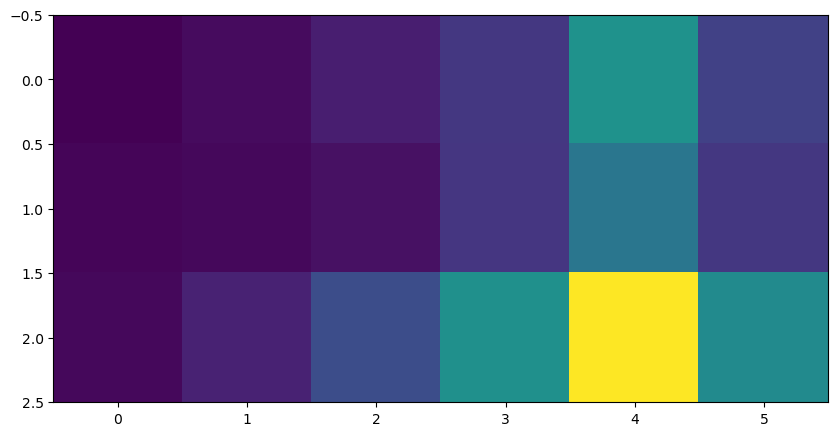

In [36]:
plt.figure(figsize=(10, 6))
plt.imshow(heatmap)

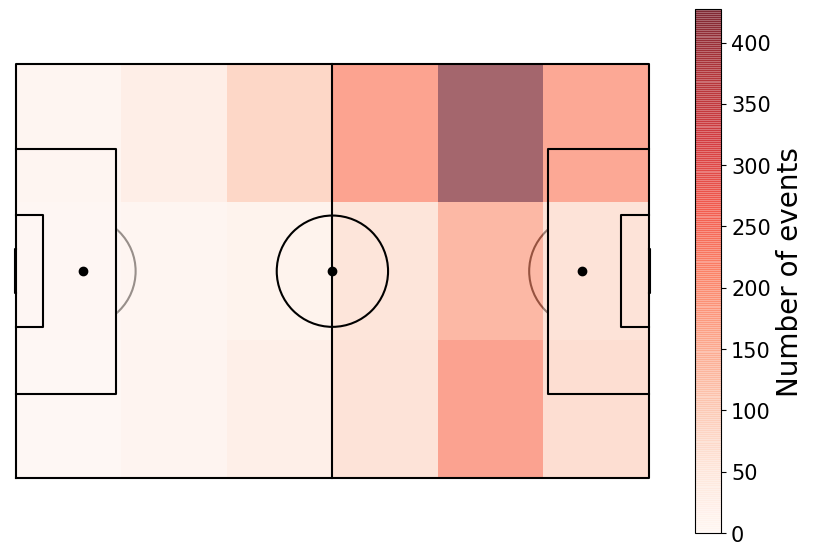

In [37]:
# 경기장 위에 히트맵 오버레이(overlay)
fig, ax = draw_pitch('white', 'black')
img = ax.imshow(heatmap[::-1], extent=[0, 104, 0, 68], vmin=0, cmap='Reds',alpha=0.6 )
cbar = fig.colorbar(img, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Number of events', size=20)
# plt.savefig('img/player_event_heatmap.png', bbox_inches='tight')

 (3) 대회 전체 슈팅 히트맵 그리기

In [38]:
events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2500092,251565539,1H,0.911,1612,Liverpool,116,G. Wijnaldum,Pass,Simple pass,[Accurate],52.00,33.32,30.16,34.68
1,2500092,251565540,1H,3.609,1612,Liverpool,25393,D. Lovren,Pass,High pass,[Accurate],30.16,34.68,70.72,63.92
2,2500092,251565541,1H,6.629,1612,Liverpool,286831,D. Solanke,Duel,Air duel,"[Neutral, Accurate]",70.72,63.92,89.44,65.96
3,2500092,251565548,1H,6.852,1651,Brighton & Hove Albion,20855,E. Schelotto,Duel,Air duel,"[Neutral, Accurate]",33.28,4.08,14.56,2.04
4,2500092,251565542,1H,8.38,1612,Liverpool,25747,S. Mané,Others on the ball,Touch,[],89.44,65.96,99.84,56.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647247,2499946,220643723,2H,2812.815,1624,Tottenham Hotspur,13484,D. Alli,Pass,Simple pass,[Accurate],32.24,14.28,34.32,14.28
647248,2499946,220643725,2H,2815.3,1624,Tottenham Hotspur,61967,V. Wanyama,Pass,Simple pass,[Accurate],34.32,14.28,22.88,8.84
647249,2499946,220643726,2H,2818.178,1624,Tottenham Hotspur,257762,D. Sánchez,Pass,High pass,[Not accurate],22.88,8.84,73.84,2.72
647250,2499946,220643819,2H,2824.022,1623,Everton,8245,P. Jagielka,Pass,Simple pass,[Accurate],30.16,65.28,9.36,33.32


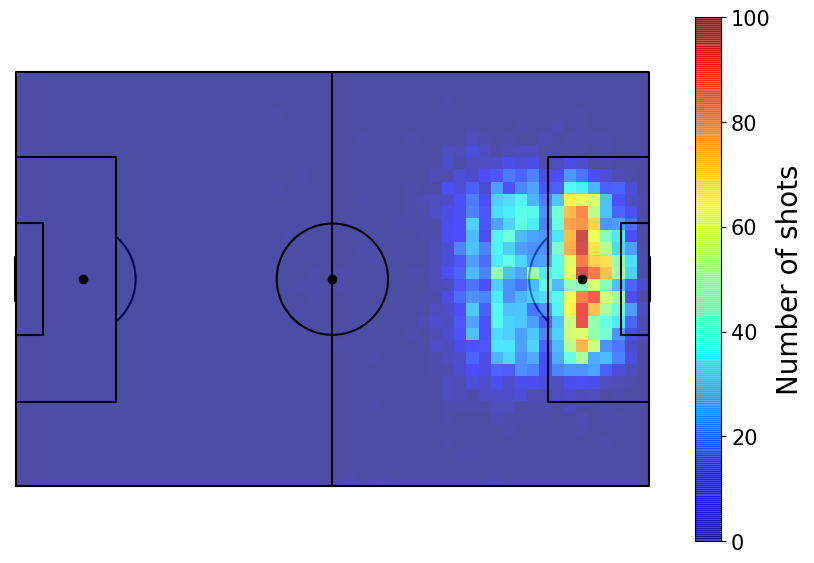

In [39]:
# 모든 슈팅 이벤트
shot_records = events[events['event_type'] == 'Shot']
x = shot_records['start_x']
y = shot_records['start_y']

# 훨씬 세분화: y=34 구간, x=52 구간
heatmap, xedges, yedges = np.histogram2d(
    y, x, bins=(34, 52), range=[[0, 68], [0, 104]]
)

fig, ax = draw_pitch('white', 'black')
img = ax.imshow(
    heatmap[::-1],
    extent=[0, 104, 0, 68],
    vmin=0,
    vmax=100,   # 최대값 조절해보기
    cmap='jet',
    alpha=0.7
)
cbar = fig.colorbar(img, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='Number of shots', size=20)

plt.show()
